In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
df = pd.read_csv("german_credit.csv")
df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df.shape

(1000, 21)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [5]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [7]:
x = df[df.columns[1:-1]]
y = df["default"]

In [8]:
from sklearn.model_selection import train_test_split
test_size = 0.50 # taking 50:50 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.head(2)

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone
262,< 0 DM,18,critical account/ other credits existing (not ...,car (new),5302,... < 100 DM,.. >= 7 years,2,male : single,none,4,unknown / no property,36,none,for free,3,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name"
457,< 0 DM,12,existing credits paid back duly till now,car (used),3386,... < 100 DM,.. >= 7 years,3,male : single,none,4,unknown / no property,35,none,for free,1,skilled employee / official,1,"yes, registered under the customers name"


In [9]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
# Print Shape of model data
df.shape

(1000, 21)

In [11]:
df_RD = pd.get_dummies(df)
df_RD.head(2)
df_RD = pd.get_dummies(df)
df_RD.head(2)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1


In [12]:
df_RD.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [13]:
df_RD.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [14]:
df_RD = pd.get_dummies(df, drop_first = True)

In [15]:
df_RD.shape

(1000, 49)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [16]:
x = df_RD[df_RD.columns[1:-1]]
y = df_RD["default"]

In [17]:
test_size = 0.70 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.head(2)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name"
406,24,2197,4,4,43,2,2,0,0,1,...,0,0,1,0,1,0,1,0,0,1
606,24,4526,3,2,74,1,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

model_RF.fit(x_train, y_train)
    
predicted = model_RF.predict(x_test)

C:\Users\pn9220\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [19]:
from sklearn import metrics

print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,predicted))

print("\n Accuracy of Model = ",metrics.accuracy_score(y_test,predicted))

Confusion Matrix:
 [[453  38]
 [136  73]]

 Accuracy of Model =  0.7514285714285714


### Q6 Show the list of the features importance( 1 Marks)

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
#Select 4 best Features
best_fit = SelectKBest(score_func=chi2, k=4)
best_fit.fit(x, y)

SelectKBest(k=4, score_func=<function chi2 at 0x000000000ACB60D0>)

In [22]:
#Display the score for each Feature
best_fit.scores_

array([3.21030795e+02, 5.82624900e+04, 2.20461935e+00, 3.76600552e-03,
       3.02003092e+01, 4.95515619e-01, 1.03071532e-03, 4.84504692e+01,
       1.81481481e+00, 6.30026589e+01, 2.33448724e+01, 1.38528139e-01,
       8.98472597e-01, 2.01190476e+01, 1.17869416e+00, 7.19251119e+00,
       8.93250116e+00, 8.23129252e+00, 4.24242424e-01, 7.77777778e-01,
       3.60168377e-01, 6.34920635e-02, 1.52910053e+00, 1.02914791e+01,
       4.44290337e-01, 4.71730915e+00, 1.36458496e+01, 9.37320044e+00,
       7.43081894e-02, 4.76847291e+00, 1.48694316e+00, 2.38095238e+00,
       3.49896480e-01, 2.94195342e+00, 2.87179487e+00, 5.25017063e-05,
       8.26161790e-02, 1.02188450e+01, 1.33778602e+01, 2.38703639e+00,
       2.43262411e+00, 5.19875776e+00, 7.06810322e+00, 6.80272109e-02,
       3.46320346e-02, 3.80952381e-01, 7.92550684e-01])

In [23]:
features = best_fit.transform(x)

In [24]:
normalized_features = (features - features.mean())/features.std()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
# Use below values
num_folds = 10
seed = 77

In [27]:
#Validate the Random Forest model build above using k fold


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.70, random_state=seed)

kfold = KFold(n_splits=num_folds,shuffle = True)

In [29]:
normalized_features = (features - features.mean())/features.std()

result = cross_val_score(model_RF, normalized_features, y, cv=kfold)

In [30]:
#Calculate Mean score

In [31]:
result.mean()

0.681

In [32]:
# Calculate score standard deviation using std()

In [33]:
result.std()

0.0439203825119955

# Q8 Print the confusion matrix( 1 Marks)

In [34]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test,predicted))

Confusion Matrix:
 [[421  71]
 [168  40]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [35]:
from sklearn.metrics import accuracy_score , precision_score
accuracy_score(y_test, predicted)

0.6585714285714286

In [36]:
metrics.precision_score(y_test,predicted)

0.36036036036036034

In [37]:
 metrics.recall_score(y_test, predicted)

0.19230769230769232

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [38]:
#Hint: Use roc_curve

In [39]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model_RF.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8903513914946841

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [40]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

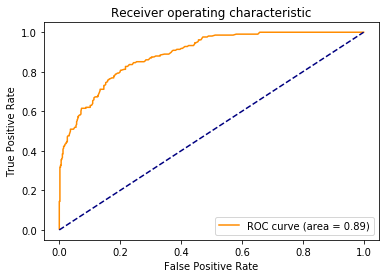

In [41]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [42]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    x_, y_ = resample(x_train, y_train)
    resample.fit(x_, y_)
    y_pred = rfm.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())